In [627]:
#importing base libraries
import numpy as np
import pandas as pd

#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing machine learning library
import statsmodels.api as sm
import statsmodels.formula.api as smf

#import warning and supress
import warnings
warnings.filterwarnings('ignore')



# Step 1: Reading and Understanding the Data

In [410]:
sharedbikes = pd.read_csv('day.csv')

In [412]:
sharedbikes['dteday'].value_counts()

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

In [414]:
sharedbikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [416]:
sharedbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [418]:
sharedbikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [422]:
sharedbikes[['temp','atemp']].value_counts()

temp       atemp   
15.170000  18.78105    2
21.832500  26.13605    2
2.424346   3.95348     1
25.146653  28.85105    1
24.873347  28.72500    1
                      ..
15.952731  19.28340    1
15.955847  19.69685    1
15.990000  19.06585    1
16.024153  19.38040    1
35.328347  40.24565    1
Name: count, Length: 728, dtype: int64

# Step 2: Visualising the Data

<Axes: xlabel='temp', ylabel='cnt'>

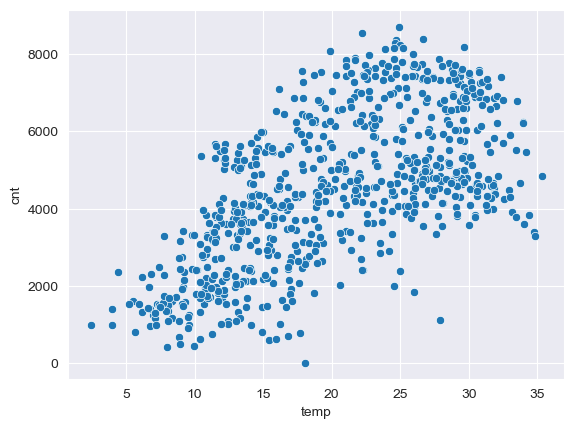

In [424]:
sns.scatterplot(y= 'cnt', x='temp', data = sharedbikes)

<Axes: xlabel='atemp', ylabel='cnt'>

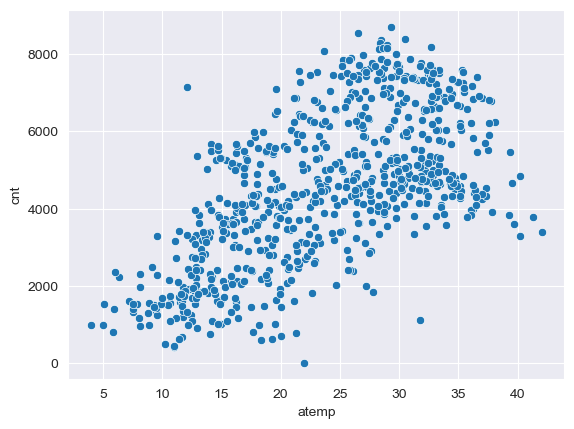

In [426]:
sns.scatterplot(y= 'cnt', x='atemp', data = sharedbikes)

In [428]:
# dteday is a duplicate column as other columns such as yr,mnth, weekday,workingday etc cover all this information.
# temp and atemp represent the same information. we can notice from above scatter plots. 
# customer feeling temprature is more important than actual temprature
# instant is just an index. Hence this will not help in model building
# removing casual and registered as these are not features
sharedbikes = sharedbikes.drop(['dteday','temp','instant', 'casual','registered'], axis = 1) 

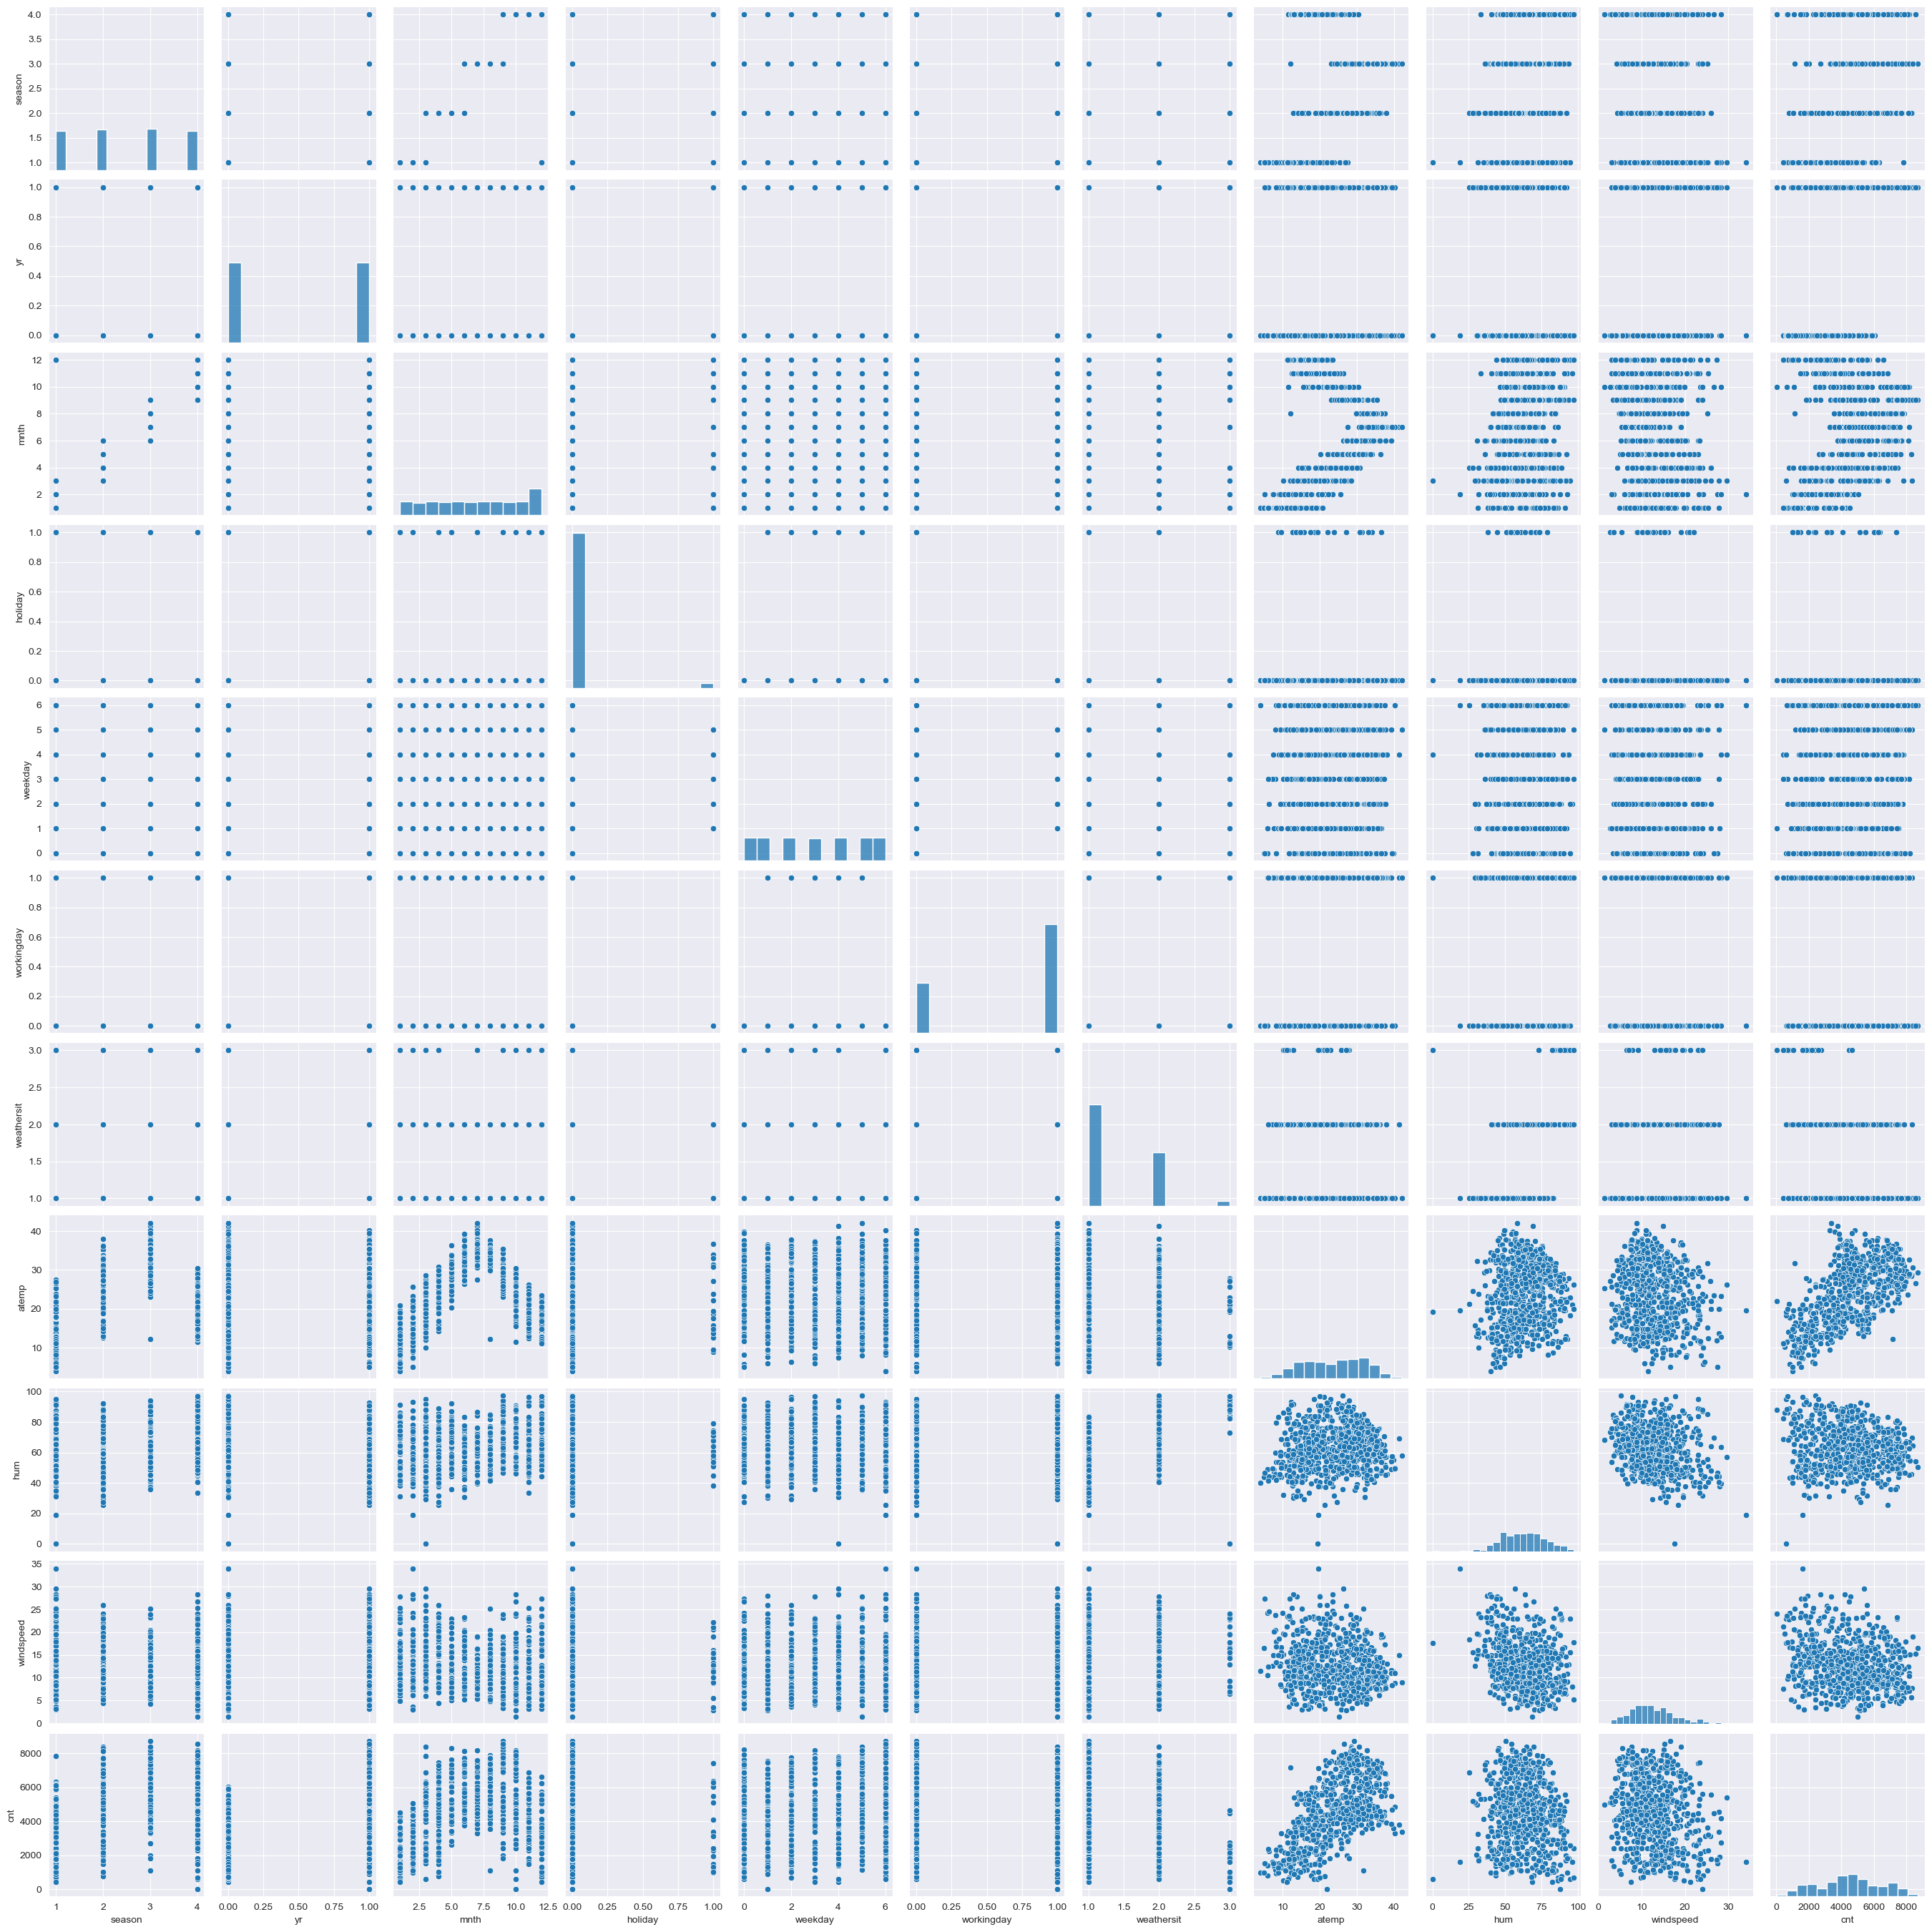

In [430]:
sns.set_style(style='darkgrid')
sns.pairplot(sharedbikes)
plt.show()

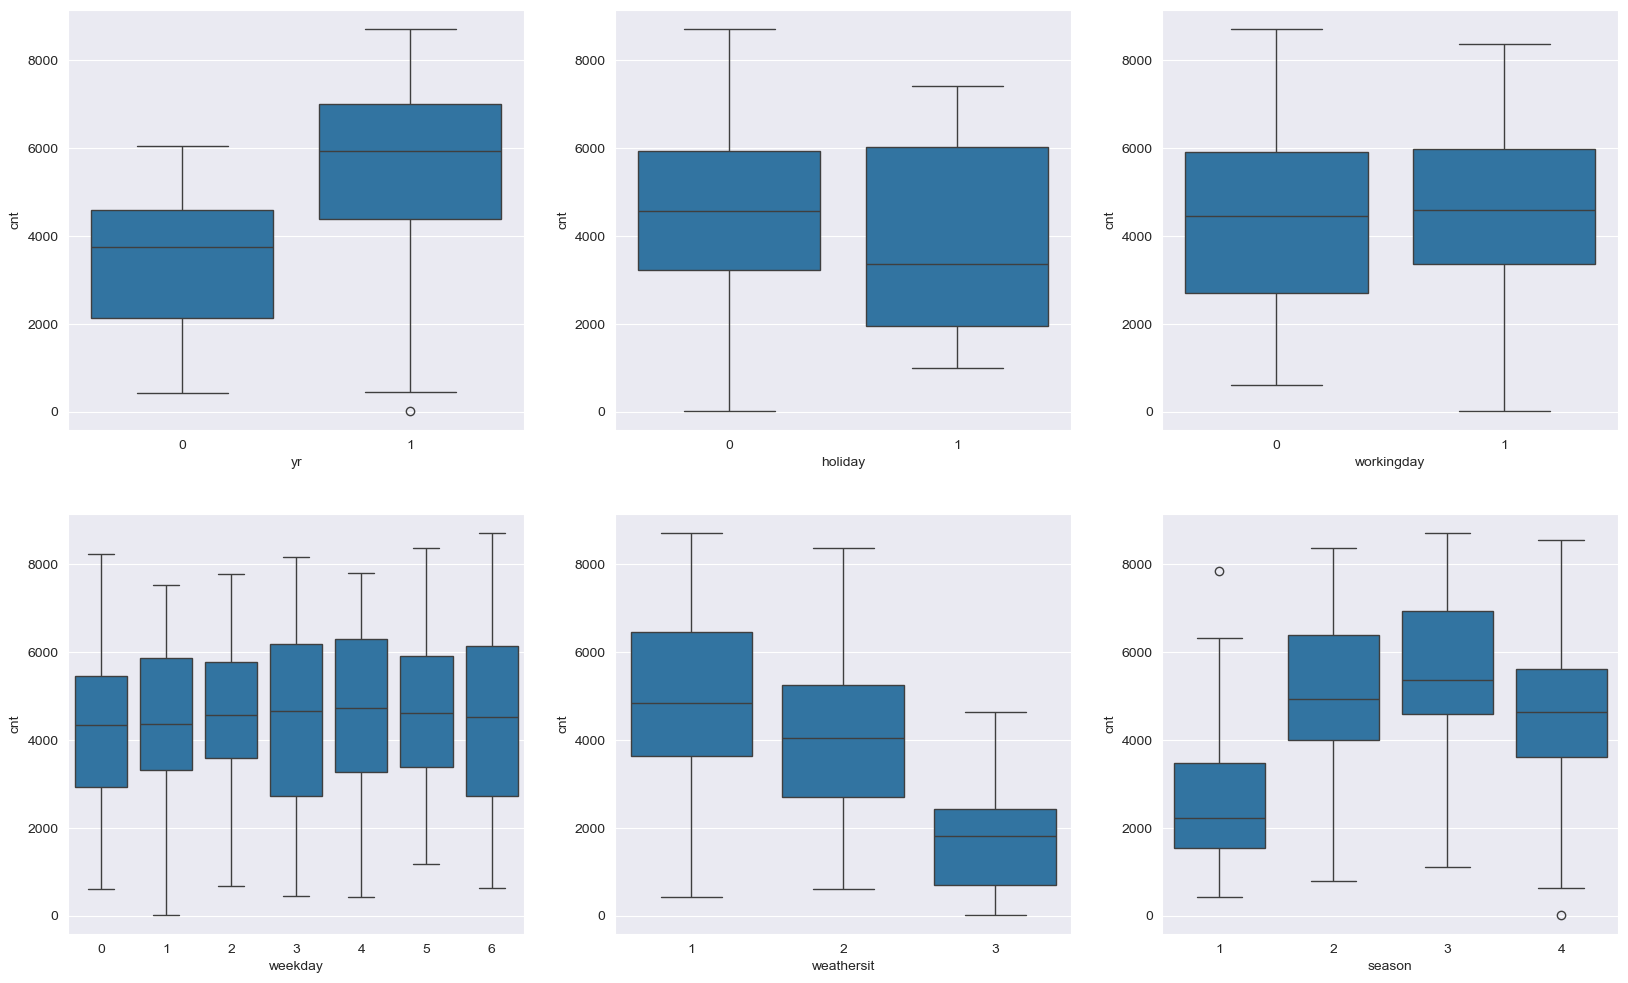

In [432]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = sharedbikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = sharedbikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = sharedbikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = sharedbikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = sharedbikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = sharedbikes)
plt.show()

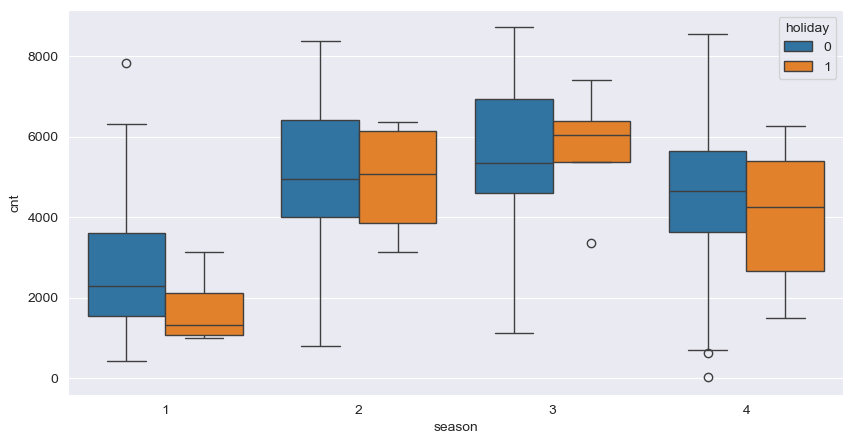

In [434]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = sharedbikes)
plt.show()

In [436]:
sharedbikes.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

From above data we can say there is no missing data

In [438]:
sharedbikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Step 3.Data Preparation

In [440]:
season_mapping = { 1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter' }
sharedbikes['season_label'] = sharedbikes['season'].map(season_mapping)

In [442]:
# weekday and season has more than 2 categorical variables. Hence lets introduce dummies
differentSeasons = pd.get_dummies(sharedbikes['season_label'], prefix='season', prefix_sep='_', dtype=int)


In [444]:
differentSeasons.head()

,season_fall,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [448]:
# drop the first column from different seasons
differentSeasons = pd.get_dummies(sharedbikes['season_label'], prefix='season', prefix_sep='_', dtype=int, drop_first=True)

In [450]:
# add results to the original data
sharedbikes = pd.concat([sharedbikes, differentSeasons], axis=1)

In [452]:
sharedbikes = sharedbikes.drop('season', axis = 1)

In [454]:
sharedbikes = sharedbikes.drop('season_label', axis = 1)

In [456]:
sharedbikes = pd.get_dummies(sharedbikes, columns=['weathersit'], prefix='weathersit', prefix_sep='_', dtype=int, drop_first=True)


In [458]:
sharedbikes = pd.get_dummies(sharedbikes, columns=['mnth'], prefix='mnth',prefix_sep='_',dtype=int, drop_first=True)

In [464]:
sharedbikes = pd.get_dummies(sharedbikes, columns=['weekday'], prefix='weekday',prefix_sep='_',dtype=int, drop_first=True)

In [466]:
sharedbikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [468]:
sharedbikes.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_2',
       'weathersit_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

# Step 4: Splitting the Data into Training and Testing Sets

In [470]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
# performing a train-test split.
df_train, df_test = train_test_split(sharedbikes, train_size=0.7, test_size=0.3, random_state=42)

### Rescaling the Features

In [472]:
from sklearn.preprocessing import MinMaxScaler

In [474]:
scaler = MinMaxScaler()

In [476]:
# Apply scaler() to all the numeric columns except the dummy' variables, yr etc
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [478]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
683,1,0,1,0.322150,0.639330,0.327101,0.605336,0,0,1,...,0,0,1,0,0,0,0,1,0,0
645,1,1,0,0.404998,0.731215,0.419004,0.609320,0,0,1,...,0,1,0,0,1,0,0,0,0,0
163,0,0,1,0.685963,0.509660,0.708724,0.554026,0,1,0,...,0,0,0,0,1,0,0,0,0,0
360,0,0,1,0.326273,0.785745,0.415925,0.088253,1,0,0,...,0,0,0,1,0,1,0,0,0,0
640,1,0,1,0.682653,0.817947,0.110593,0.862127,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [480]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,0.250980,...,0.090196,0.090196,0.092157,0.074510,0.149020,0.131373,0.139216,0.147059,0.129412,0.150980
std,0.500025,0.163554,0.471169,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,0.434003,...,0.286744,0.286744,0.289531,0.262857,0.356457,0.338139,0.346511,0.354512,0.335985,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

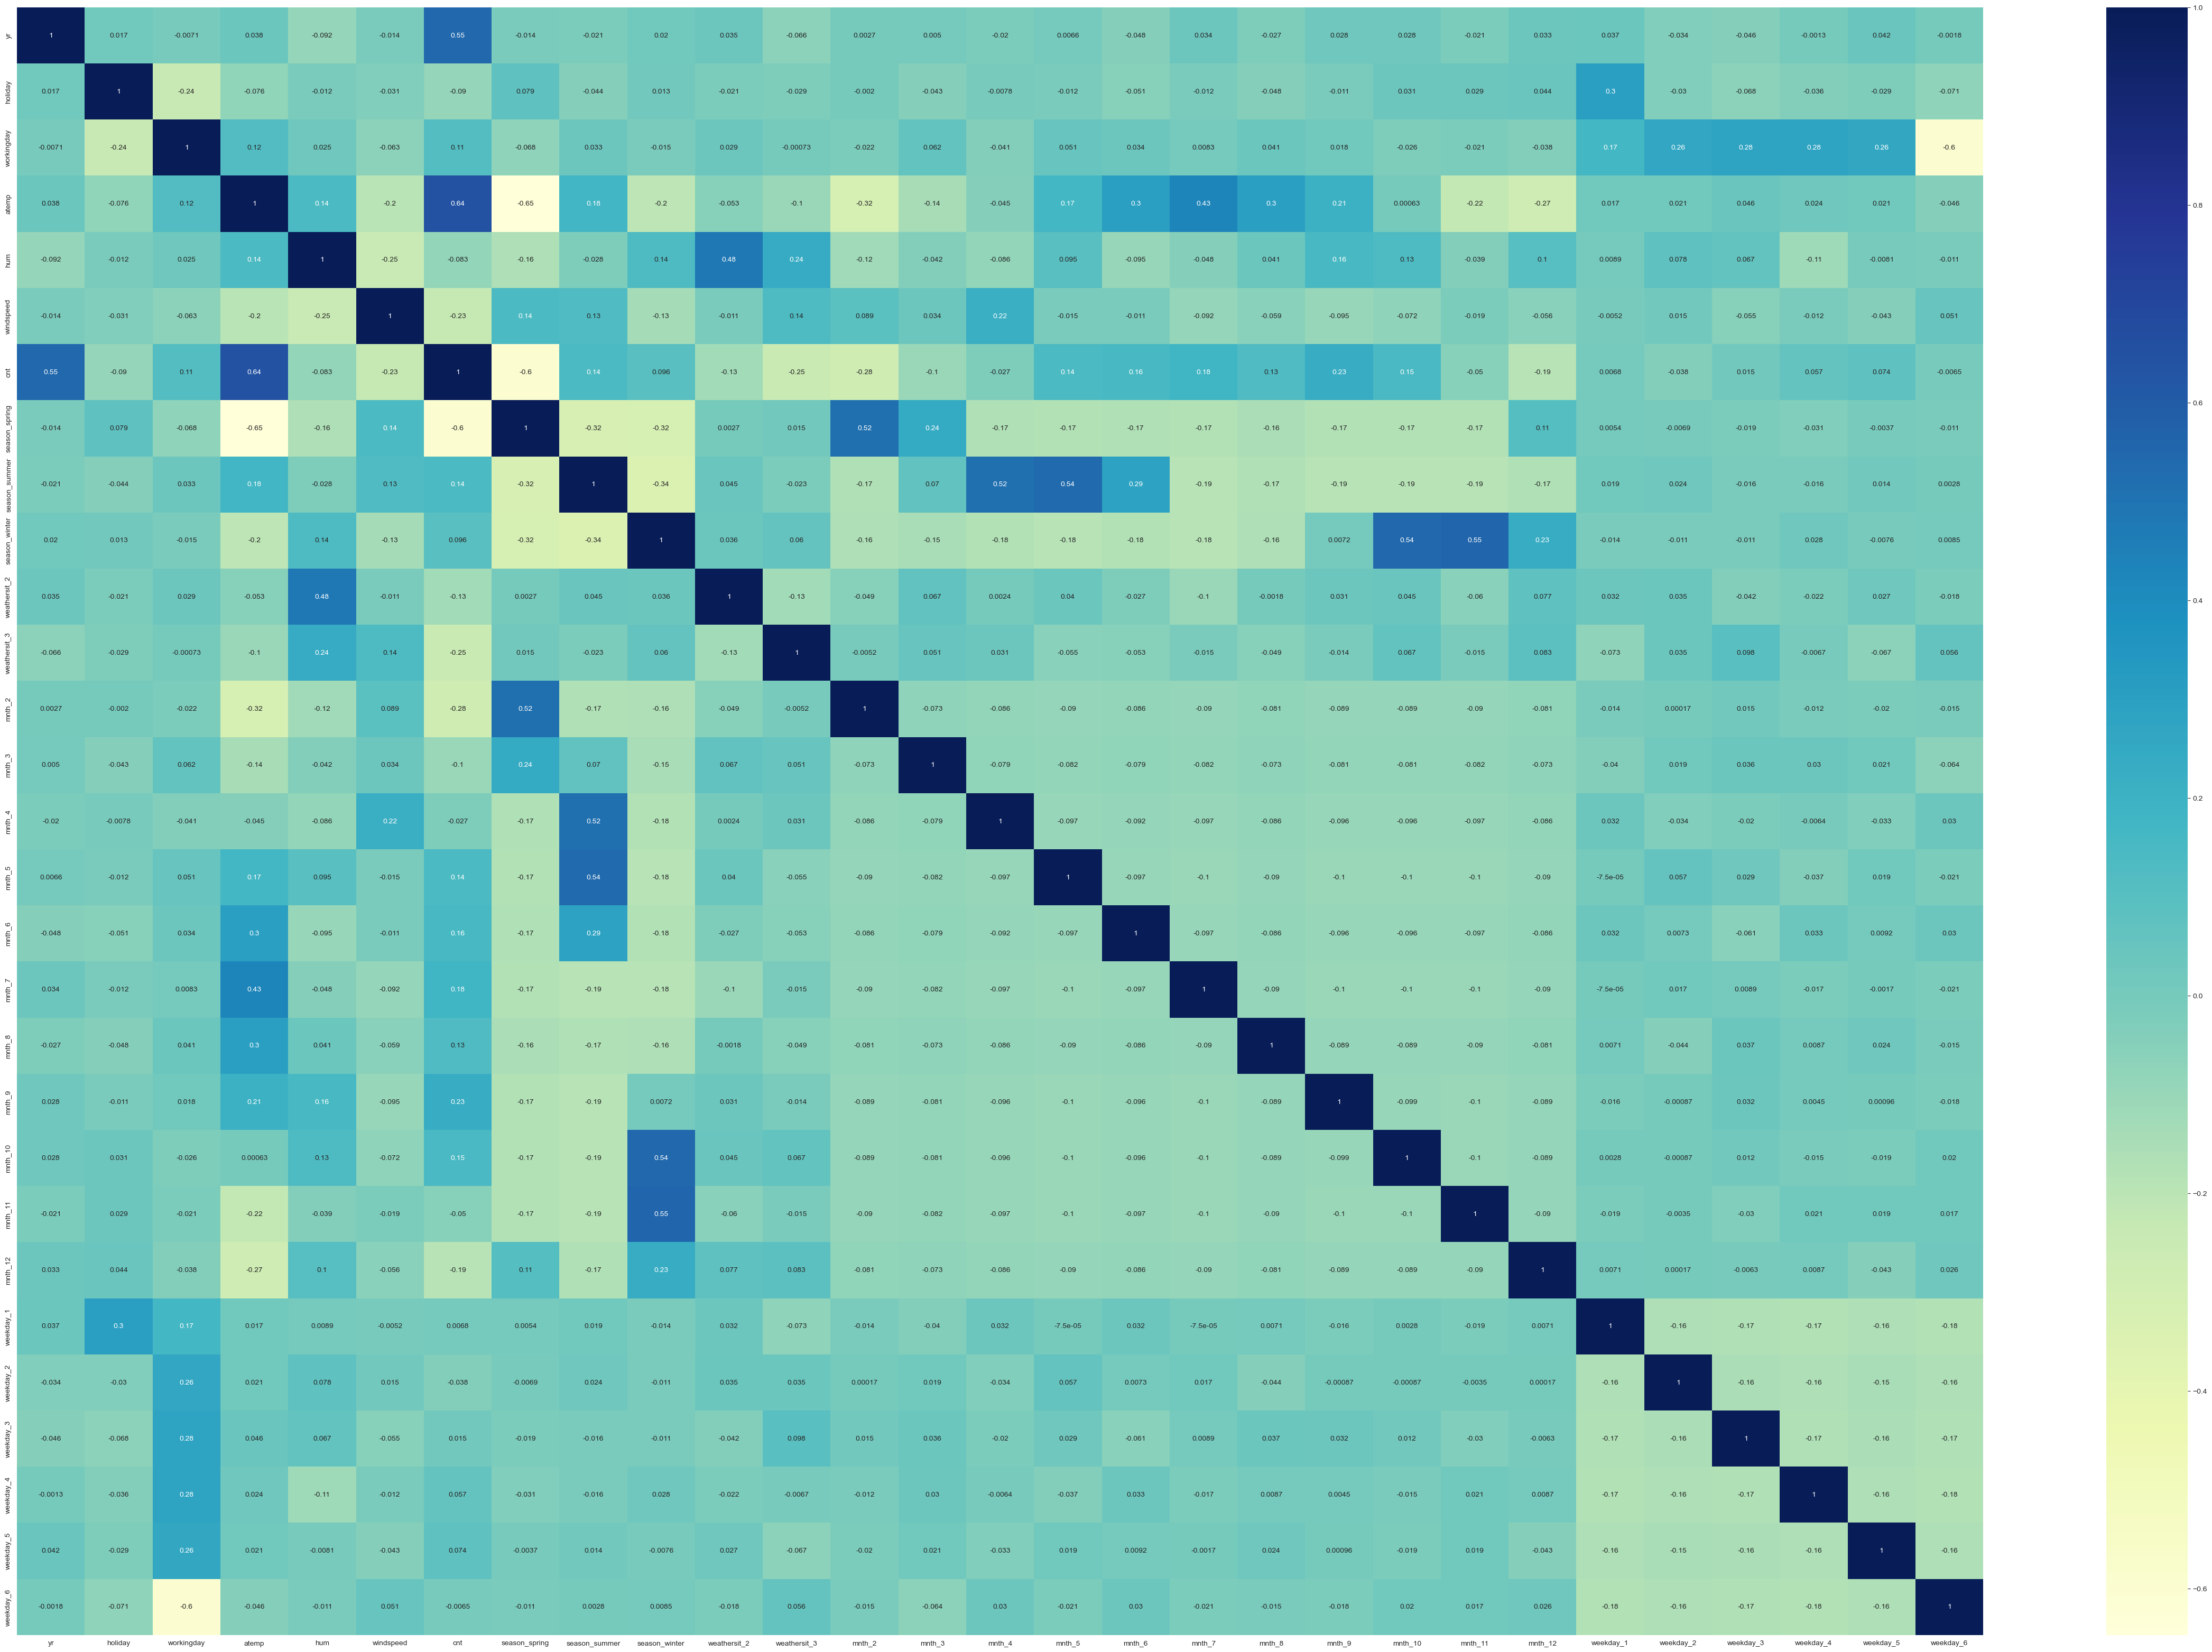

In [490]:
plt.figure(figsize=(60,40))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

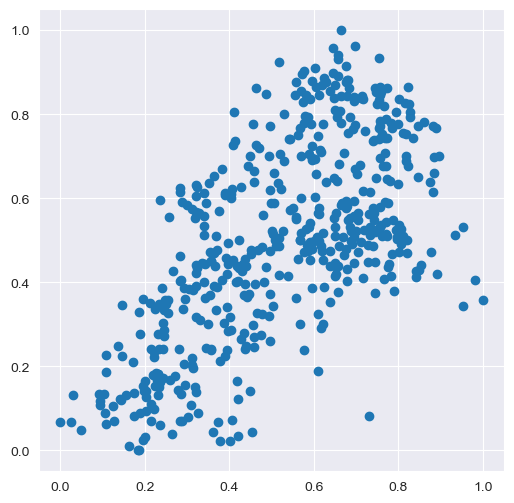

In [496]:
# from above correlation we can see atemp has highest corr with cnt. Same we can see in scatter plot as well below
plt.figure(figsize=(6,6))
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

# Dividing into X and Y sets for the model building

In [499]:
# removing cnt as our target variable to find is cnt. Hence taking it into y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [501]:
# as we have 29 columns. Going to choose RFE approach

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [505]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator= lm,n_features_to_select= 15)
rfe = rfe.fit(X_train,y_train)

In [507]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 14),
 ('mnth_3', False, 12),
 ('mnth_4', False, 8),
 ('mnth_5', False, 10),
 ('mnth_6', False, 7),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', False, 9),
 ('mnth_10', False, 13),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 3),
 ('weekday_2', False, 2),
 ('weekday_3', False, 5),
 ('weekday_4', False, 6),
 ('weekday_5', False, 4),
 ('weekday_6', True, 1)]

In [511]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'weathersit_2', 'weathersit_3',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_6'],
      dtype='object')

In [513]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5'],
      dtype='object')

# Step 5: Building model using statsmodel, for the detailed statistics


In [534]:
# X train dataframe with RFE selected columns
X_train_rfe = X_train[col]

In [536]:
# adding constant variable
X_train_rfe_lm = sm.add_constant(X_train_rfe)

In [538]:
# running lenear model
lm = sm.OLS(y_train, X_train_rfe_lm).fit()

In [540]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.87e-185
Time:                        09:00:49   Log-Likelihood:                 485.05
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     494   BIC:                            -870.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2945      0.038      7.763

# Step 6: Checking VIF

In [542]:
# checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [544]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
4,hum,25.57
3,atemp,20.10
2,workingday,5.12
5,windspeed,5.10
7,season_winter,2.79
6,season_spring,2.72
8,weathersit_2,2.23
0,yr,2.10
14,weekday_6,1.91
12,mnth_11,1.83


In [558]:
# from above we can see hum has VIF greater than 5. Hence we need to drop
X_train_rfe_new = X_train_rfe.drop('hum', axis=1)

In [560]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_new)
lr_1 = sm.OLS(y_train,X_train_rfe_lm).fit()

In [562]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          2.01e-183
Time:                        09:43:11   Log-Likelihood:                 477.48
No. Observations:                 510   AIC:                            -925.0
Df Residuals:                     495   BIC:                            -861.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2057      0.031      6.729

In [564]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,atemp,8.55
4,windspeed,5.07
2,workingday,5.02
6,season_winter,2.49
0,yr,2.09
5,season_spring,1.90
13,weekday_6,1.87
11,mnth_11,1.80
7,weathersit_2,1.57
9,mnth_7,1.49


In [566]:
# atemp has more than 5 VIF. Hence this need to be dropped
X_train_rfe_new = X_train_rfe_new.drop('atemp', axis=1)

In [568]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_new)
lr_2 = sm.OLS(y_train,X_train_rfe_lm).fit()

In [570]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.75e-156
Time:                        09:52:10   Log-Likelihood:                 410.63
No. Observations:                 510   AIC:                            -793.3
Df Residuals:                     496   BIC:                            -734.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5110      0.020     25.630

In [574]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,windspeed,4.03
2,workingday,3.38
5,season_winter,2.47
0,yr,1.98
10,mnth_11,1.74
4,season_spring,1.63
12,weekday_6,1.58
6,weathersit_2,1.55
11,mnth_12,1.30
8,mnth_7,1.19


In [584]:
# from above all VIF is below 5. But mnth_7 has P value greater than 0.05. Hence this need to be dropped
X_train_rfe_new = X_train_rfe_new.drop('mnth_7', axis=1)

In [586]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_new)
lr_3 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [588]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.69e-157
Time:                        10:18:27   Log-Likelihood:                 410.43
No. Observations:                 510   AIC:                            -794.9
Df Residuals:                     497   BIC:                            -739.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5145      0.019     26.930

In [590]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,windspeed,4.00
2,workingday,3.27
5,season_winter,2.39
0,yr,1.96
9,mnth_11,1.74
11,weekday_6,1.56
4,season_spring,1.55
6,weathersit_2,1.54
10,mnth_12,1.30
8,mnth_8,1.14


In [592]:
# from above we can see VIF is fine. But mnth_8 has high P value. Hence mnth_8 need to be dropped
X_train_rfe_new = X_train_rfe_new.drop('mnth_8', axis=1)

In [594]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_new)
lr_4 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [596]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.56e-158
Time:                        10:28:11   Log-Likelihood:                 410.22
No. Observations:                 510   AIC:                            -796.4
Df Residuals:                     498   BIC:                            -745.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5168      0.019     27.540

In [604]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending= False)
vif

,Features,VIF
3,windspeed,3.98
2,workingday,3.19
5,season_winter,2.35
0,yr,1.96
8,mnth_11,1.74
10,weekday_6,1.55
6,weathersit_2,1.54
4,season_spring,1.50
9,mnth_12,1.30
1,holiday,1.10


In [606]:
# from above VIF is fine. But holiday has high P value i.e. greater than 0.05
X_train_rfe_new = X_train_rfe_new.drop('holiday', axis=1)

In [608]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_new)
lr_5 = sm.OLS(y_train,X_train_rfe_lm).fit()

In [610]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          2.30e-159
Time:                        10:37:06   Log-Likelihood:                 409.49
No. Observations:                 510   AIC:                            -797.0
Df Residuals:                     499   BIC:                            -750.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5107      0.018     28.263

In [612]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,windspeed,3.88
1,workingday,3.02
4,season_winter,2.34
0,yr,1.94
7,mnth_11,1.73
5,weathersit_2,1.54
9,weekday_6,1.51
3,season_spring,1.49
8,mnth_12,1.30
6,weathersit_3,1.09


In [614]:
# from above VIF is fine. But season_winter has high P value i.e. greater than 0.05. Hence droping season_winter     
X_train_rfe_new = X_train_rfe_new.drop('season_winter', axis=1)

In [616]:
X_train_rfe_lm = sm.add_constant(X_train_rfe_new)
lr_6 = sm.OLS(y_train,X_train_rfe_lm).fit()

In [618]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          7.67e-160
Time:                        10:43:43   Log-Likelihood:                 407.87
No. Observations:                 510   AIC:                            -795.7
Df Residuals:                     500   BIC:                            -753.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5181      0.018     29.394

In [622]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,3.87
1,workingday,2.96
0,yr,1.92
4,weathersit_2,1.52
8,weekday_6,1.50
3,season_spring,1.37
6,mnth_11,1.12
7,mnth_12,1.11
5,weathersit_3,1.09


### lr_6 has both VIF and P values in acceptable range. Hence lr_6 is the final model

# Step 7: Residual analysis of train data

In [625]:
y_train_cnt = lr_6.predict(X_train_rfe_lm)

Text(0.5, 0, 'Errors')

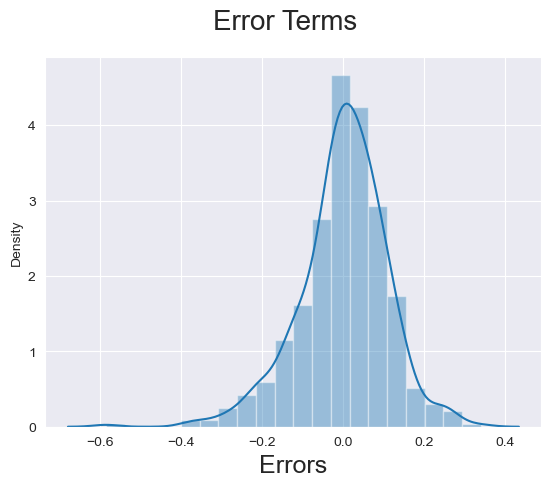

In [631]:
# plot figure for error terms
fig = plt.figure()
sns.distplot((y_train-y_train_cnt), bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize=18)

##### from above diagram we can see residuals are scattered around 0. Hence Residual analysis is fine.

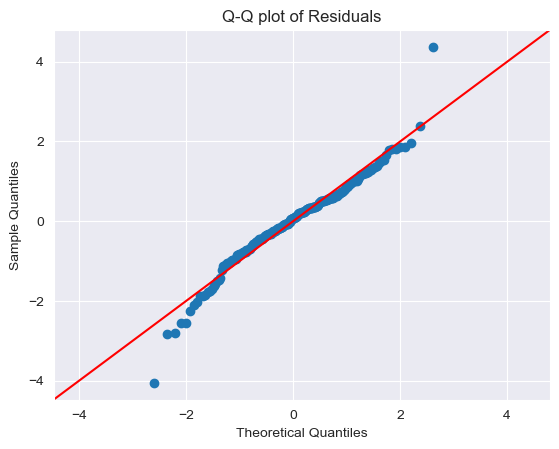

In [697]:
residuals = y_test - y_pred
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot of Residuals')
plt.show()

##### in Q-Q plot points on the 45-degree reference line indicate normal distribution

# Step 8: Making predictions using final model

### Applying scaling on test set

In [635]:
# Apply scaler() to all the numeric columns except the dummy' variables, yr etc
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

### Dividing into X_test, y_test

In [639]:
y_test = df_test.pop('cnt')
X_test = df_test

In [667]:
# make predictions using model
#dropping unrequired columns
X_test_new = X_test[X_train_rfe_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [669]:
X_test_new.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'season_spring',
       'weathersit_2', 'weathersit_3', 'mnth_11', 'mnth_12', 'weekday_6'],
      dtype='object')

In [647]:
X_train_rfe_new.columns

Index(['yr', 'workingday', 'windspeed', 'season_spring', 'weathersit_2',
       'weathersit_3', 'mnth_11', 'mnth_12', 'weekday_6'],
      dtype='object')

##### from above we can see both test and train has same set of columns 

In [671]:
y_pred = lr_6.predict(X_test_new)


# Step 9: Model evaluation

Text(0, 0.5, 'y_pred')

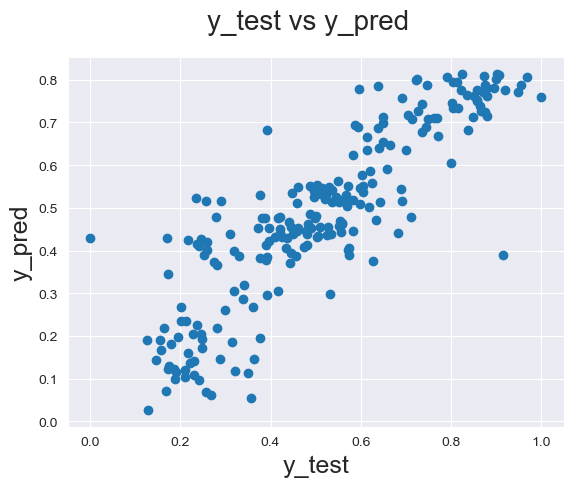

In [680]:
# plotting y_test & Y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_pred", fontsize = 20)
plt.xlabel("y_test", fontsize = 18)
plt.ylabel("y_pred", fontsize = 18)

In [684]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7296099815423289